In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from mlxtend.evaluate import confusion_matrix

%matplotlib inline
import matplotlib.pyplot as plt

import os
import sys
sys.path.append(os.path.abspath('/home/jma/Documents/code'))
    



import h2o

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321.

/home/jma/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


.... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_121"; OpenJDK Runtime Environment (Zulu 8.20.0.5-linux64) (build 1.8.0_121-b15); OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-linux64) (build 25.121-b15, mixed mode)
  Starting server from /home/jma/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmphaf_9quk
  JVM stdout: /tmp/tmphaf_9quk/h2o_jma_started_from_python.out
  JVM stderr: /tmp/tmphaf_9quk/h2o_jma_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.11
H2O cluster version age:,25 days
H2O cluster name:,H2O_from_python_jma_jamja9
H2O cluster total nodes:,1
H2O cluster free memory:,13.94 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [29]:
full=pd.read_csv('/media/jma/SHAREOS/TSP_PROSPECT_SEGMENT.csv')
full=full[['Gender_1_206',
'Individual_Exact_Age_Enhan_223',
'Advantage_Individual_Marita_248',
'Target_ValueScore_20_All_614',
'Target_ValueScore_20_Aut_616',
'Target_ValueScore_20_Ban_618',
'Target_ValueScore_20_Ret_620',
'Occupation_649',
'Advantage_Number_of_Adults_809',
'Advantage_Household_Age_Cod_811',
'Advantage_Home_Owner_813',
'Advantage_Household_Size_E_815',
'Advantage_Household_Marital_817',
'Advantage_Presence_of_Child_819',
'Advantage_Dwelling_Type_821',
'Advantage_Length_of_Residen_823',
'Advantage_Household_Educati_825',
'Children_Age_0_to_2_Enhan_835',
'Children_Age_3_to_5_Enhanc_836',
'Children_Age_6_to_10_Enhan_837',
'Children_Age_11_to_15_Enha_838',
'Children_Age_16_to_17_Enha_839',
'Household_Type_Family_Com_840',
'Number_of_Children_in_House_842',
'Number_of_Generations_in_Ho_843',
'Advantage_Target_Income_20_876',
'Target_PreMover_20_Model_879',
'Target_Net_Worth_20_881',
'Target_Income_Index_20_882',
'Current_Loan_to_Value_890',
'Target_Home_Market_Value_894',
'Available_home_equity_in_th_899',
'First_mortgage_amount_in_th_903',
'Home_equity_loan_in_thousan_913',
'Home_Market_Value_Tax_Reco_918',
'Home_Sale_Price_in_Thousan_932',
'Living_Area_Square_Footage_936',
'Mortgage_Interest_Rate_or_943',
'Second_mortgage_amount_in_t_950',
'Original_Mortgage_Amount_954',
'Property_Lot_Size_in_Acres_958',
'Empty_Nester_Trigger_987',
'Home_Market_Value_Trigger_1001',
'Income_Trigger_1009',
'New_Adult_to_File_Trigger_1017',
'NewPre_Driver_Trigger_1024',
'New_Young_Adult_to_File_Tri_1031',
'Newly_Married_Trigger_1038',
'Newly_Single_Trigger_1045',
'Retired_Trigger_1052',
'Wealth_Resources_1089',
'Investment_Resources_1091',
'Liquid_Resources_1093',
'Mortgage_Liability_1095',
'Short_Term_Liability_1099',
'Gold_Wallets_1100',
'Platinum_Wallets_1101',
'Silver_Wallets_1102',
'Mobility_Score_1878',
'Merit_Score_1881',
'FT_SEGMENT_SOLUTION']          
]



#correct mapping of target

d_target={1:3, 2:4, 3:2, 4:5,5:1}
full['FT_SEGMENT_SOLUTION']=full['FT_SEGMENT_SOLUTION'].map(d_target)


In [3]:
# Advantage_Target_Income_20_876   
d1={1:1,
2:2,
3:3,
4:4,
5:5,
6:6,
7:7,
8:8,
9:9,
'A':10,
'B':11,
'C':12,
'D':13
}


d2={'Y':1, 'N':0}

#target value score
d3={'A1':1.0,
'A2':2.0,
'B1':3.0,
'B2':4.0,
'C1':5.0,
'C2':6.0,
'D1':7.0,
'D2':8.0,
'D3':9.0
}

#merit score,TriggerVal_ValueScore_1060
d4={'A1':1.0,
'A2':2.0,
'B1':3.0,
'B2':4.0,
'C1':5.0,
'C2':6.0,
'D1':7.0,
'D2':8.0,
'D3':9.0,
'E1':10.0,
'E2':11.0,
'E3':12.0
}


d5={
'A':'10',
'B':'11',
'C':'12',
'D':'13'
}

d6={
'N':'0',
'D':'1',
'I':'-1',
}

d7={
'A':1.0,
    'B':2.0,
    'C':3.0,
    'D':4.0,
    'E':5.0,
    'F':6.0,
    'G':7.0,
    'H':8.0,
    'I':9.0,
    'J':10.0,
    'K':11.0,
    'L':12.0,
    'M':13.0,
    'N':14.0,
    'O':15.0,
    'P':16.0,
    'Q':17.0,
    'Z':18.0
            
}

d8={'I': '0', 'D': '1'}

full['Property_Lot_Size_in_Acres_958']=full['Property_Lot_Size_in_Acres_958'].map(d4) 

full['Merit_Score_1881']=full['Merit_Score_1881'].map(d4)  

full['Mobility_Score_1878']=full['Mobility_Score_1878'].map(d4) 

full['Target_ValueScore_20_All_614']=full['Target_ValueScore_20_All_614'].map(d3)  
full['Target_ValueScore_20_Aut_616']=full['Target_ValueScore_20_Aut_616'].map(d3) 
full['Target_ValueScore_20_Ban_618']=full['Target_ValueScore_20_Ban_618'].map(d3)  
full['Target_ValueScore_20_Ret_620']=full['Target_ValueScore_20_Ret_620'].map(d3)  

full['Target_Home_Market_Value_894_v']=full.Target_Home_Market_Value_894.str[0:4].fillna(0).astype(float)  
full['Advantage_Target_Income_20_876']=full['Advantage_Target_Income_20_876'].map(d1)  


full['Current_Loan_to_Value_890']=full['Current_Loan_to_Value_890'].fillna(0).astype(float) 
full['Available_home_equity_in_th_899']=full['Available_home_equity_in_th_899'].fillna(0).astype(float)  
full['Advantage_Length_of_Residen_823']=full['Advantage_Length_of_Residen_823'].fillna(0).astype(float)  
full['Target_PreMover_20_Model_879']=full['Target_PreMover_20_Model_879'].fillna(0).astype(float)  

full['Gold_Wallets_1100'].fillna('N',inplace=True)
full['Silver_Wallets_1102'].fillna('N',inplace=True)
full['Platinum_Wallets_1101'].fillna('N',inplace=True)

full['Gold_Wallets_1100']= full['Gold_Wallets_1100'].map(d2)
full['Silver_Wallets_1102']= full['Silver_Wallets_1102'].map(d2) 
full['Platinum_Wallets_1101']= full['Platinum_Wallets_1101'].map(d2)   

full['Liquid_Resources_1093']=full['Liquid_Resources_1093'].astype(float)  
full['Wealth_Resources_1089']=full['Wealth_Resources_1089'].astype(float)  


full['Empty_Nester_Trigger_987']=full['Empty_Nester_Trigger_987'].map(d2).astype(float)  
full['Home_Market_Value_Trigger_1001']=full['Home_Market_Value_Trigger_1001'].map(d3).astype(float) 
full['Income_Trigger_1009']=full['Income_Trigger_1009'].map(d3).astype(float) 

full=full.drop(['Target_Home_Market_Value_894'],axis=1)
full['New_Adult_to_File_Trigger_1017']=full['New_Adult_to_File_Trigger_1017'].map(d2).astype(float) 
full['NewPre_Driver_Trigger_1024']=full['NewPre_Driver_Trigger_1024'].map(d2).astype(float) 
full['New_Young_Adult_to_File_Tri_1031']=full['New_Young_Adult_to_File_Tri_1031'].map(d2).astype(float) 
full['Newly_Married_Trigger_1038']=full['Newly_Married_Trigger_1038'].map(d2).astype(float) 
full['Newly_Single_Trigger_1045']=full['Newly_Single_Trigger_1045'].map(d2).astype(float) 
full['Retired_Trigger_1052']=full['Retired_Trigger_1052'].map(d2).astype(float) 

full['Living_Area_Square_Footage_936']=full['Living_Area_Square_Footage_936'].map(d7).astype(float) 


#le=LabelEncoder()
#le.fit(full.Niches_40_180)
#full['niches_num']=le.transform(full.Niches_40_180)
#full=full.drop(['Niches_40_180'],axis=1)



full=full.fillna(-99)

In [4]:
full.head()

,Gender_1_206,Individual_Exact_Age_Enhan_223,Advantage_Individual_Marita_248,Target_ValueScore_20_All_614,Target_ValueScore_20_Aut_616,Target_ValueScore_20_Ban_618,Target_ValueScore_20_Ret_620,Occupation_649,Advantage_Number_of_Adults_809,Advantage_Household_Age_Cod_811,...,Liquid_Resources_1093,Mortgage_Liability_1095,Short_Term_Liability_1099,Gold_Wallets_1100,Platinum_Wallets_1101,Silver_Wallets_1102,Mobility_Score_1878,Merit_Score_1881,FT_SEGMENT_SOLUTION,Target_Home_Market_Value_894_v
0,1,28.0,1,4.0,4.0,2.0,2.0,0,2,2,...,2.0,45.0,9,0,0,0,-99.0,1.0,3,106.0
1,1,53.0,1,2.0,2.0,5.0,5.0,0,2,4,...,10.0,-99.0,1,0,0,0,-99.0,4.0,2,0.0
2,2,71.0,1,2.0,7.0,2.0,3.0,5,2,6,...,1.0,42.0,1,0,0,0,-99.0,6.0,4,16.0
3,1,65.0,2,4.0,6.0,5.0,4.0,6,2,6,...,3.0,-99.0,1,0,0,0,-99.0,4.0,4,134.0
4,2,36.0,1,5.0,3.0,3.0,3.0,0,2,3,...,3.0,53.0,8,0,0,0,-99.0,2.0,5,127.0


In [9]:
#X=full[['Occupation_649','Number_of_Children_in_House_842','Current_Loan_to_Value_890','Target_Net_Worth_20_881','Advantage_Target_Income_20_876','Individual_Exact_Age_Enhan_223','Merit_Score_1881','Mobility_Score_1878','Liquid_Resources_1093','Wealth_Resources_1089','Available_home_equity_in_th_899','Target_Home_Market_Value_894_v','Target_PreMover_20_Model_879','Target_ValueScore_20_All_614']]
X=full.drop(['FT_SEGMENT_SOLUTION'],axis=1)
y=full['FT_SEGMENT_SOLUTION']


In [10]:
#full.to_csv('/media/jma/SHAREOS/TSP_PROSPECT_SEGMENT_processed1.csv', index=False)
#pd.DataFrame(full.dtypes, columns=['type'])

In [11]:
et=ExtraTreesClassifier(n_estimators=1500)
rf=RandomForestClassifier(n_estimators=1500)
xgboost_tree = xgb.XGBClassifier(max_depth=3,learning_rate=0.01,n_estimators=200,objective='multi:softprob')
lr=LogisticRegression(C=1000)
scores=cross_val_predict(xgboost_tree, X, y)

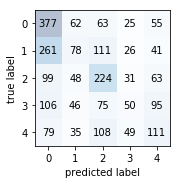

TypeError: data argument can't be an iterator

In [12]:
cm = confusion_matrix(y_target=y, y_predicted=scores)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()
accuracy_score(y,scores)
mod=xgboost_tree.fit(X,y)
VI=pd.DataFrame(zip(mod.feature_importances_,X.columns))
VI.columns=['VAR','SCORE']

In [5]:
from plot_1D_response import plot_1D_response
    
   


In [22]:
pred_lst=['Individual_Exact_Age_Enhan_223','Target_Net_Worth_20_881','Gold_Wallets_1100','Merit_Score_1881','Occupation_649']
type_lst=['num','num','cat','num','cat']
ptest=plot_1D_response(full,'FT_SEGMENT_SOLUTION',pred_lst, type_lst,True,10, True)
#ptest=plot_1D_response(full,'FT_SEGMENT_SOLUTION',pred_lst, type_lst, True,10, True)
ptest.create_plots()



Processed: Individual_Exact_Age_Enhan_223
Processed: Target_Net_Worth_20_881
Processed: Gold_Wallets_1100
Processed: Merit_Score_1881
Processed: Occupation_649


In [18]:
ptest.interact_tables()

interactive(children=(Dropdown(description='var_name', options=('Individual_Exact_Age_Enhan_223', 'Target_Net_…

In [23]:
ptest.interact_plots()

interactive(children=(Dropdown(description='var_name', options=('Individual_Exact_Age_Enhan_223', 'Target_Net_…

In [15]:
ptest.hold_tables['Target_Net_Worth_20_881']

,Target_Net_Worth_20_881,1,2,3,4,5
0,0,0.086111,0.138889,0.322222,0.194444,0.258333
1,1,0.122449,0.163265,0.251701,0.204082,0.258503
2,2,0.160000,0.160000,0.280000,0.200000,0.200000
3,3,0.138889,0.185185,0.259259,0.194444,0.222222
4,4,0.092105,0.151316,0.210526,0.315789,0.230263
5,5,0.200000,0.200000,0.212000,0.148000,0.240000
6,6,0.297593,0.218818,0.172867,0.148796,0.161926
7,7,0.370821,0.297872,0.142857,0.124620,0.063830
8,8,0.419192,0.287879,0.121212,0.121212,0.050505
9,9,0.447005,0.364055,0.096774,0.059908,0.032258


In [21]:
full['cluster1']=np.where(full['FT_SEGMENT_SOLUTION']==1,1,0)
full.groupby('Target_Net_Worth_20_881')['cluster1'].mean()


Target_Net_Worth_20_881
0    0.086111
1    0.122449
2    0.160000
3    0.138889
4    0.092105
5    0.200000
6    0.297593
7    0.370821
8    0.419192
9    0.447005
Name: cluster1, dtype: float64

In [93]:
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, IntSlider, Layout
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

class freq_tables:
    
   
    def __init__(self, df, numeric_cut=20):
        

        
        self.df=df
        self. numeric_cut = numeric_cut
        self.hold_counts={}
        self.list_cols = []
        
    def create_freqs(self):
        for column in self.df:
            if self.df[column].dtype == object or self.df[column].nunique() <self.numeric_cut:
                self.list_cols.append(column)
                v1=self.df[column].value_counts()
                v1=v1.reset_index().rename(columns={"index": "Level", column: "Count"})
                v1=v1.sort_values('Level')
                v1=v1.append([{'Level':'NULL', 'Count':self.df[column].isnull().sum()}])
                v1=v1.reset_index(drop=True)
                self.hold_counts[column]=v1
        
    def display_table (var_name):
        return(self.hold_counts[var_name])

    def interact_tables (self):
        interact(display_table, var_name=self.list_cols)    
        

In [94]:
freqs=freq_tables(full)
freqs.create_freqs()
freqs.interact_tables()

interactive(children=(Dropdown(description='var_name', options=('Gender_1_206', 'Advantage_Individual_Marita_2…

In [88]:
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, IntSlider, Layout
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

def display_table (var_name):
    return(hold_counts[var_name])

interact(display_table, var_name=list_cols)

interactive(children=(Dropdown(description='var_name', options=('Gender_1_206', 'Advantage_Individual_Marita_2…

<function __main__.display_table>